In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, glob

In [103]:
def plot_corr(data, figsize=(15,15)):
    '''
    Plot correlation 
    Args:
    - data: pd dataframe
    '''
    corr = data.corr()
    sns.set(font_scale=1.2)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    with sns.axes_style("white"):
        f, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(corr, mask=mask, square=True, 
                         vmin= -1, vmax=1,
                         cmap='RdBu_r', center=0, annot=True,
                        annot_kws={'fontsize':8})

In [104]:
path = os.path.join(os.path.dirname(os.getcwd()), '../Data/Extracted_data/')
os.chdir(path)

In [105]:
fatigue = pd.read_excel('FatigueSampleInventory.xlsx', 
                        index_col=' Specimen ID',
                        usecols=[' Specimen ID', 'Cycles at NDE Test', 'Cycles at Failure', 'Current Unfailed Cycles']
                       )
fatigue['f'] = fatigue['Cycles at NDE Test']/fatigue['Cycles at Failure']

NLE_raw = pd.read_csv('NLE.csv', index_col='Sample')

In [106]:
merged = NLE_raw.join([fatigue], how='left')
NLE = merged.copy()
NLE.reset_index(inplace=True)
NLE.columns

Index(['index', 'freq', 'S10', 'S11', 'S12', 'Cycles at NDE Test',
       'Cycles at Failure', 'Current Unfailed Cycles', 'f'],
      dtype='object')

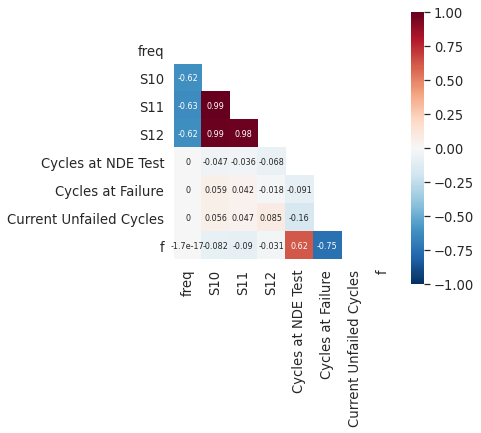

In [107]:
plot_corr(NLE, figsize=(5,5))

In [108]:
NLE_plot = NLE[['index', 'freq', 'Cycles at NDE Test', 'S10', 'S11', 'S12']].melt(id_vars=['index', 'freq', 'Cycles at NDE Test'], value_name='NLE')

<AxesSubplot:>

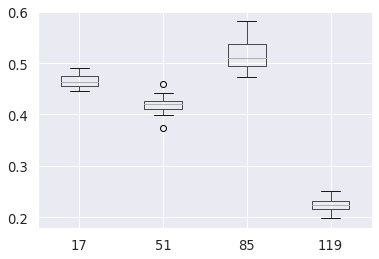

In [109]:
NLE['NLE_avg'] = NLE[['S10', 'S11', 'S12']].mean(axis=1)
pd.pivot_table(NLE, index='index' ,columns='freq', values='NLE_avg').boxplot()

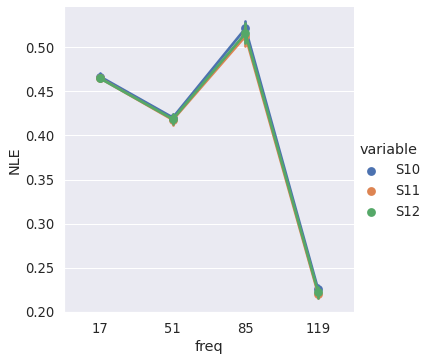

In [110]:
sns.catplot(y='NLE', x='freq', kind='point', hue='variable', aspect = 1,
            data=NLE_plot,
           sharex=False, sharey=False)

In [179]:
NLE_ratio = pd.pivot_table(NLE, index=['index', 'f'],columns='freq', values=['S10' ,'S11' ,'S12'])

In [180]:
for replicate in ['S10', 'S11', 'S12'] : 
    for freq in [51,  85, 119]:
        NLE_ratio[(replicate+'_ratio_17',  freq)] = NLE_ratio[(replicate,  freq)]/NLE_ratio[(replicate,  17)]

In [181]:
for replicate in ['S10', 'S11', 'S12'] : 
    for freq in [17, 51,  85]:
        NLE_ratio[(replicate+'_ratio_119',  freq)] = NLE_ratio[(replicate,  freq)]/NLE_ratio[(replicate,  119)]

In [182]:
NLE_ratio = NLE_ratio.stack().reset_index()

In [183]:
NLE_ratio.columns

Index(['index', 'f', 'freq', 'S10', 'S11', 'S12', 'S10_ratio_17',
       'S11_ratio_17', 'S12_ratio_17', 'S10_ratio_119', 'S11_ratio_119',
       'S12_ratio_119'],
      dtype='object')

In [184]:
NLE_plot_2 = NLE_ratio.melt(id_vars=['index', 'freq', 'f'], value_name='NLE')
NLE_plot_2.dropna(how='any', inplace=True)
NLE_plot_2.sort_values('f', inplace=True)
NLE_plot_2['f'] = NLE_plot_2['f'].round(4)

In [185]:
NLE_plot_2_avg = NLE_plot_2[NLE_plot_2['variable'].isin(['S10', 'S11', 'S12'])]
NLE_plot_2_ratio_17 = NLE_plot_2[NLE_plot_2['variable'].isin(['S10_ratio_17', 'S11_ratio_17','S12_ratio_17'])]
NLE_plot_2_ratio_119 = NLE_plot_2[NLE_plot_2['variable'].isin(['S10_ratio_119', 'S11_ratio_119','S12_ratio_119'])]

Text(0.5, 0.98, 'AVG')

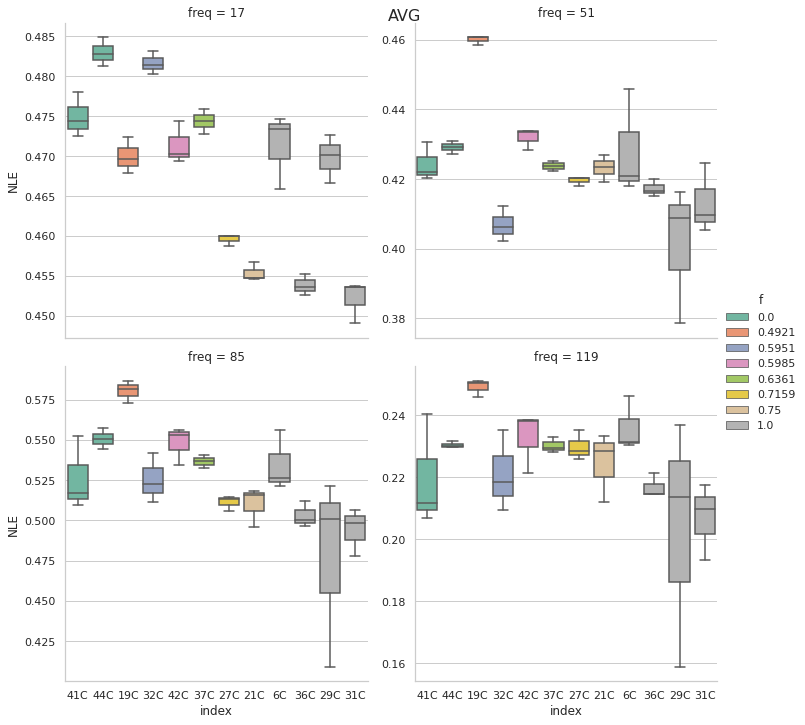

In [163]:
sns.set(style='whitegrid')
g = sns.catplot(y='NLE', x='index', kind='box', hue='f', col='freq', sharey=False,
            data=NLE_plot_2_avg, col_wrap=2, palette=sns.color_palette('Set2', n_colors=8),dodge=False
            )
g.fig.suptitle('RATIO', fontsize=16)

Text(0.5, 0.98, 'RATIO')

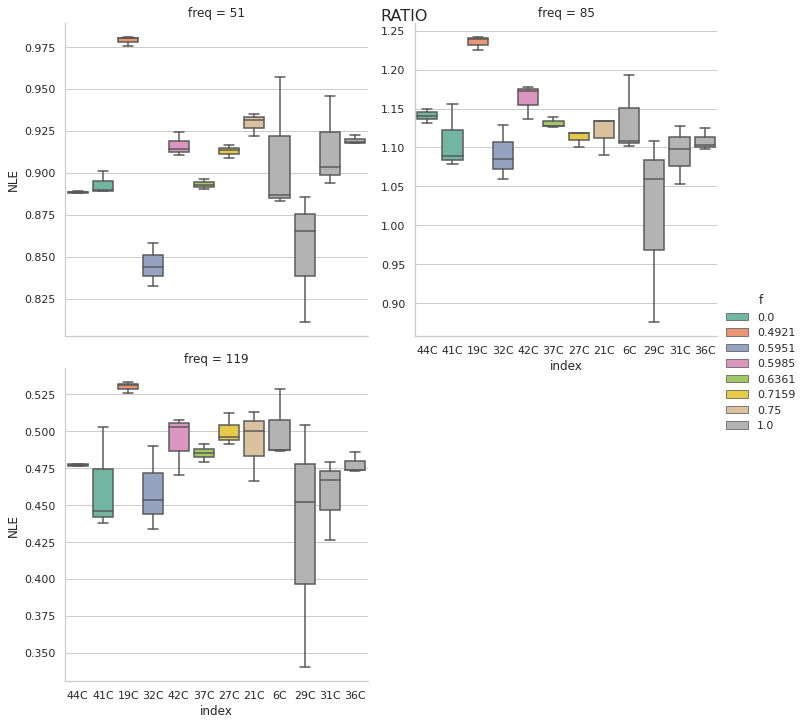

In [186]:
sns.set(style='whitegrid')
g = sns.catplot(y='NLE', x='index', kind='box', hue='f', col='freq', sharey=False,
            data=NLE_plot_2_ratio_17, col_wrap=2, palette=sns.color_palette('Set2', n_colors=8),dodge=False
            )
g.fig.suptitle('RATIO', fontsize=16)

Text(0.5, 0.98, 'RATIO')

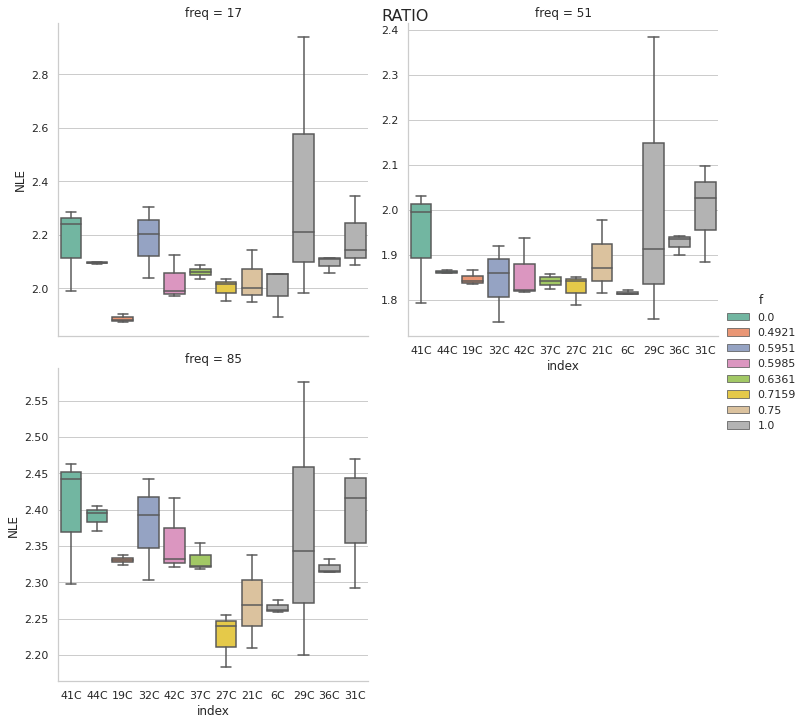

In [187]:
sns.set(style='whitegrid')
g = sns.catplot(y='NLE', x='index', kind='box', hue='f', col='freq', sharey=False,
            data=NLE_plot_2_ratio_119, col_wrap=2, palette=sns.color_palette('Set2', n_colors=8),dodge=False
            )
g.fig.suptitle('RATIO', fontsize=16)

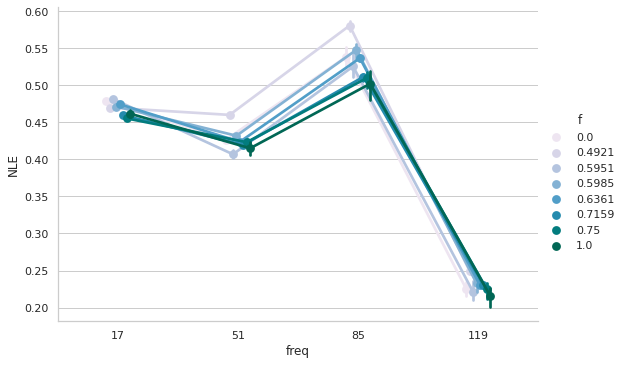

In [164]:
g = sns.catplot(y='NLE', x='freq', kind='point', hue='f', aspect=1.5,
            data=NLE_plot_2_avg, palette=sns.color_palette('PuBuGn', n_colors=8), dodge=True,
               )

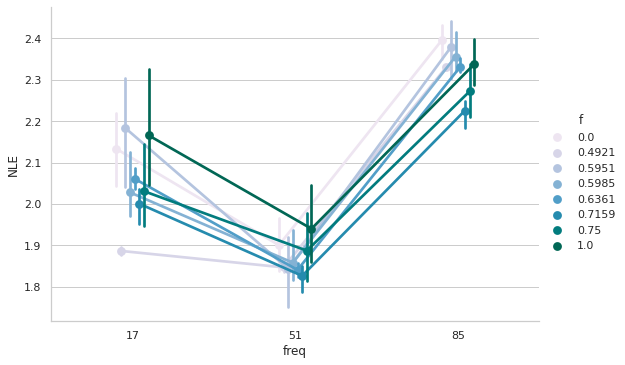

In [188]:
g = sns.catplot(y='NLE', x='freq', kind='point', hue='f', aspect=1.5,
            data=NLE_plot_2_ratio_119, palette=sns.color_palette('PuBuGn', n_colors=8), dodge=True,
               )

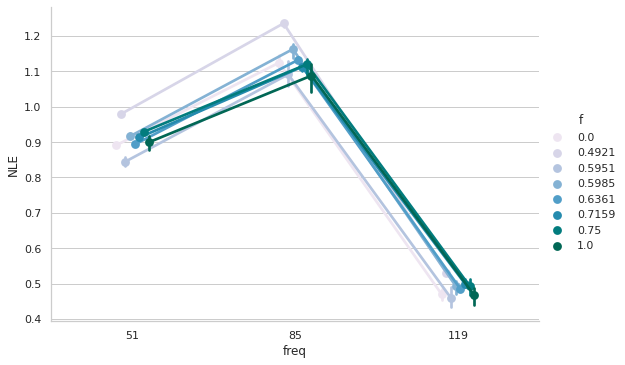

In [189]:
g = sns.catplot(y='NLE', x='freq', kind='point', hue='f', aspect=1.5,
            data=NLE_plot_2_ratio_17, palette=sns.color_palette('PuBuGn', n_colors=8), dodge=True,
               )